遗传算法解决最优化问题

In [50]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [149]:
x = np.linspace(-2,2,100)

def func(x):
    return x**2
y = func(x)


In [164]:

def init_pop(size):
    pop = np.random.uniform(low=-2,high=2,size=size)
    return pop

pop = init_pop(10)

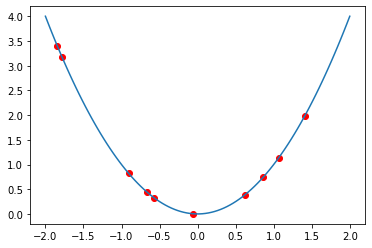

In [151]:
plt.plot(x,y)
y_fit = [func(i) for i in pop]
plt.scatter(pop, y_fit,c='r')


In [152]:
def fitness(x):
    if (x>2 or x<-2):  
        return -100
    else: 
        return -x**2


In [153]:

def fitness_pop(pop):
    pop_fit = np.array([fitness(x) for x in pop])
    avg_fit = pop_fit.mean()
    max_fit = pop_fit.max()
    return avg_fit,max_fit

fitness_pop(pop)

(-1.2420732931708498, -0.003391389359281686)

In [154]:
def fitness_prob(pop):
    return np.exp([fitness(x) for x in pop])/np.sum(np.exp([fitness(x) for x in pop]))

fitness_prob(pop)


array([0.00921557, 0.15101517, 0.00745463, 0.1602252 , 0.09779016,
       0.14360612, 0.22202591, 0.1063034 , 0.03081827, 0.07154556])

In [155]:
def crossover(p1,p2):
    weight = np.random.rand()
    p1_sub = p1*weight
    p2_sub = p2*(1-weight)
    children = p1_sub+p2_sub
    return children

In [156]:

def mutate(p):
    step = np.random.randn()*0.1
    children = p+step
    return children


In [157]:
# 进化参数
mut_rate = 0.1 # 变异率
children_size = len(pop)

In [158]:
def reproduce(pop_parent,children_size):
    next_generation = []
    prob = fitness_prob(pop_parent) 
    for _ in range(children_size):
        p1, p2 = np.random.choice(len(pop),size=2, replace=False,p=prob) 
        next_generation.append(crossover(pop_parent[p1], pop_parent[p2]))
    return np.array(next_generation)

In [159]:
def pop_mutate(pop,mut_rate):    
    mut_num = int(mut_rate*len(pop)) # 计算待变异基因数量
    mut_index = np.random.choice(len(pop), mut_num,replace=False)  # 抽取待变异基因编号
    for i in mut_index:
        pop[i] = mutate(pop[i]) 
    return pop

In [160]:
def selector(pop_parent,pop_children):    
    pop_group = np.concatenate([pop_children,pop_parent])
    prob = fitness_prob(pop_group)
    index = np.random.choice(len(pop_group),size = len(pop_parent),replace=False,p=prob) 
    return pop_group[index]


In [161]:
# begin
pop_parent = init_pop(10)
avg_fit, max_fit = fitness_pop(pop_parent)

iter_num = 0
while iter_num < 10:

    next_generation = reproduce(pop_parent,children_size)
    next_generation = pop_mutate(next_generation,mut_rate)
    next_generation= selector(pop_parent,next_generation)
    avg_fit, max_fit = fitness_pop(next_generation)
    print("第{n}代种群的适应度：{x:.3f},最优秀的适应度：{y:.3f}".format(n=iter_num, x=avg_fit,y=max_fit))
    iter_num = iter_num + 1   # 进入下一轮
    pop_parent = next_generation

第0代种群的适应度：-0.402,最优秀的适应度：-0.000
第1代种群的适应度：-0.193,最优秀的适应度：-0.000
第2代种群的适应度：-0.063,最优秀的适应度：-0.006
第3代种群的适应度：-0.026,最优秀的适应度：-0.001
第4代种群的适应度：-0.019,最优秀的适应度：-0.001
第5代种群的适应度：-0.010,最优秀的适应度：-0.000
第6代种群的适应度：-0.023,最优秀的适应度：-0.000
第7代种群的适应度：-0.023,最优秀的适应度：-0.001
第8代种群的适应度：-0.009,最优秀的适应度：-0.000
第9代种群的适应度：-0.009,最优秀的适应度：-0.000


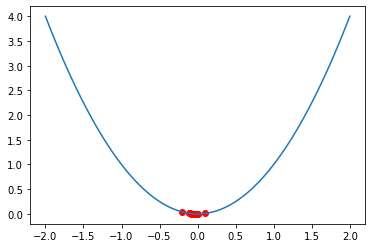

In [162]:
plt.plot(x,y)
pop_fit = [func(i) for i in pop_parent]
plt.scatter(pop_parent, pop_fit,c='r')


遗传算法解决背包问题

In [64]:
weight = np.array([35, 30, 60, 50, 40, 10, 25])
value = np.array([10, 40, 30, 50, 35, 40, 30])

In [65]:
def init_pop(pop_num,pop_size):
    pop = []
    for _ in range(pop_num):
        pop.append(np.random.randint(0,2,pop_size))
    return np.array(pop)
pop = init_pop(20,7)
pop

array([[1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 0, 1, 1],
       [0, 1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 1, 0],
       [1, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 1, 0, 1],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 1, 0, 1, 1],
       [1, 0, 1, 0, 0, 0, 0]])

In [68]:
def fitness(select):
    result = np.sum(select*value/weight)
    sum_weight = np.sum(select*weight)
    if sum_weight > 150:
        result = -100
    return result

def fitness_pop(pop):
    pop_fit = np.array([fitness(x) for x in pop])
    avg_fit = pop_fit.mean()
    max_fit = pop_fit.max()
    return avg_fit,max_fit

In [69]:
fitness_pop(pop)

(-6.688869047619048, 7.819047619047619)

In [70]:
def fitness_prob(pop):
    return np.exp([fitness(x) for x in pop])/np.sum(np.exp([fitness(x) for x in pop]))

fitness_prob(pop)

array([2.34431318e-04, 3.07044434e-02, 2.34431318e-04, 1.99741979e-01,
       5.32294344e-03, 5.84904376e-04, 6.96765125e-04, 2.62135955e-03,
       4.31073318e-02, 4.38228610e-01, 6.03168512e-03, 5.06230689e-02,
       6.55365087e-48, 6.55365087e-48, 6.96765125e-04, 3.19346969e-02,
       4.31073318e-02, 2.62135955e-03, 1.43121382e-01, 3.86511901e-04])

In [71]:
def mutate(select):
    index = np.random.choice(len(select), 1)
    if select[index] ==0:
        select[index]=1
    else:
        select[index]=0
    return select

print(pop[0])
print(mutate(pop[0]))

[1 0 0 0 0 0 0]
[1 0 0 1 0 0 0]


In [118]:
def crossover(p1,p2):
    index = random.randint(1,len(p1))
    p1_sub = p1[:index]
    p2_sub = p2[index:]
    children = np.concatenate([p1_sub,p2_sub])
    return children

In [122]:
# 进化参数
mut_rate = 0.1 # 变异率
children_size = len(pop)

In [131]:
next_generation

[array([1, 0, 1, 0, 0, 1, 1]),
 array([1, 0, 1, 0, 0, 1, 0]),
 array([1, 0, 1, 0, 0, 1, 0]),
 array([1, 0, 0, 1, 0, 1, 0]),
 array([1, 0, 1, 0, 0, 1, 0]),
 array([1, 0, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 1, 0]),
 array([1, 0, 1, 0, 1, 1, 0]),
 array([1, 0, 1, 0, 0, 1, 1]),
 array([0, 0, 0, 1, 0, 1, 0]),
 array([1, 0, 0, 1, 0, 0, 0]),
 array([1, 0, 1, 0, 1, 1, 0]),
 array([0, 0, 0, 1, 0, 1, 0]),
 array([0, 0, 0, 1, 0, 1, 1]),
 array([1, 0, 0, 1, 0, 1, 1]),
 array([0, 0, 1, 0, 1, 1, 0]),
 array([1, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 1, 1, 0]),
 array([0, 0, 0, 1, 0, 1, 1]),
 array([0, 0, 0, 1, 0, 1, 0])]

In [144]:
# begin
pop_parent  = init_pop(20,7)
avg_fit, max_fit = fitness_pop(pop_parent)

iter_num = 0
while iter_num < 20:

    next_generation = reproduce(pop_parent,children_size)
    next_generation = pop_mutate(next_generation,mut_rate)
    next_generation= selector(pop_parent,next_generation)
    avg_fit, max_fit = fitness_pop(next_generation)
    print("第{n}代种群的适应度：{x:.3f},最优秀的适应度：{y:.3f}".format(n=iter_num, x=avg_fit,y=max_fit))
    iter_num = iter_num + 1   # 进入下一轮
    pop_parent = next_generation

第0代种群的适应度：5.477,最优秀的适应度：7.533
第1代种群的适应度：6.134,最优秀的适应度：7.819
第2代种群的适应度：6.511,最优秀的适应度：7.819
第3代种群的适应度：7.149,最优秀的适应度：7.819
第4代种群的适应度：7.602,最优秀的适应度：7.819
第5代种群的适应度：7.676,最优秀的适应度：7.819
第6代种群的适应度：7.705,最优秀的适应度：7.819
第7代种群的适应度：7.733,最优秀的适应度：7.819
第8代种群的适应度：7.719,最优秀的适应度：7.819
第9代种群的适应度：7.719,最优秀的适应度：7.819
第10代种群的适应度：7.690,最优秀的适应度：7.819
第11代种群的适应度：7.719,最优秀的适应度：7.819
第12代种群的适应度：7.748,最优秀的适应度：7.819
第13代种群的适应度：7.762,最优秀的适应度：7.819
第14代种群的适应度：7.790,最优秀的适应度：7.819
第15代种群的适应度：7.730,最优秀的适应度：7.819
第16代种群的适应度：7.745,最优秀的适应度：7.819
第17代种群的适应度：7.819,最优秀的适应度：7.819
第18代种群的适应度：7.819,最优秀的适应度：7.819
第19代种群的适应度：7.819,最优秀的适应度：7.819


In [145]:
pop_parent

array([[1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1]])

In [141]:
def total_value_weight(pop):
    total_value = np.sum([s*value for s in pop],1)
    total_weight =np.sum([s*weight for s in pop],1)
    return total_value, total_weight

total_value_weight(pop_parent)

(array([170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 130, 170,
        170, 170, 170, 170, 170, 170, 170]),
 array([150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 120, 150,
        150, 150, 150, 150, 150, 150, 150]))

用遗传算法训练神经网络

In [1]:
import torch  
from torch import nn
import torch.nn.functional as F
import numpy as np
import random
import os
from copy import deepcopy


In [143]:
X = np.random.randint(1,10,[100,2])
y = X[:,0]*X[:,1]
y= y.reshape(100,1)

In [144]:
# 定义超参数
input_size = 2
hidden_size = 50
output_size = 1
n_iter = 3000
generation_size = 20
mutate_rate = 0.2
parameter_len = (input_size+1)*hidden_size+(hidden_size+1)*output_size

In [145]:
class NeuralNet(nn.Module):
	
	def __init__(self, input_size, hidden_size, output_size):
		super().__init__()
		self.linear1 = nn.Linear(input_size, hidden_size)
		self.linear2 = nn.Linear(hidden_size, output_size)

	def forward(self, x):
		x = F.relu(self.linear1(x))
		x = self.linear2(x)
		return x

	def get_weight(self):
		return deepcopy([self.linear1.weight.data,
				self.linear1.bias.data,
				self.linear2.weight.data,
				self.linear2.bias.data])

	def set_weight(self,weights):
		weights = deepcopy(weights)
		self.linear1.weight = nn.Parameter(weights[0])
		self.linear1.bias = nn.Parameter(weights[1])
		self.linear2.weight = nn.Parameter(weights[2])
		self.linear2.bias = nn.Parameter(weights[3])

In [146]:
criterion = nn.MSELoss()

In [147]:
def init_pop(size = generation_size):
    pop = []
    for _ in range(size):
        pop.append(NeuralNet(input_size, hidden_size, output_size)) 
    return pop 

def fitness(model,inputs, targets):
    outputs = model(inputs)
    loss = criterion(outputs, targets) 
    output = 1/loss.item() 
    return output

def fitness_prob(pop,inputs, targets):
    fitness_value = []
    for model in pop:
        fitness_value.append(fitness(model, inputs, targets))
    fitness_value = np.array(fitness_value)
    return fitness_value/np.sum(fitness_value)


def get_pop_weights(pop):
    weights = []
    for model in pop:
        weights.append(model.get_weight())
    return weights

def set_pop_weights(pop, weights):
    for model, weight in zip(pop, weights):
        model.set_weight(weight)
    return pop 


In [148]:
def list2tensor(weights):
	return torch.concat([weights[0].flatten(),weights[1],
							weights[2].flatten(),weights[3]])

def tensor2list(weights):
	output_weights = []
	index  = [input_size*hidden_size, 
			input_size*hidden_size+hidden_size,
			input_size*hidden_size+hidden_size+hidden_size*output_size]
	output_weights.append(weights[:index[0]].reshape(hidden_size,input_size))
	output_weights.append(weights[index[0]:index[1]])
	output_weights.append(weights[index[1]:index[2]].reshape(output_size,hidden_size))
	output_weights.append(weights[index[2]:])
	return output_weights

def cross_mutate(weights_1, weights_2, rate):
	weights_1 = list2tensor(weights_1)
	weights_2 = list2tensor(weights_2)
	crossover_idx = random.randint(0, parameter_len-1)
	new_weights = torch.concat([weights_1[:crossover_idx] , weights_2[crossover_idx:]])
	if random.randint(0,generation_size-1) <= generation_size*mutate_rate:
		mutate_num = int(rate*parameter_len)
		for _ in range(mutate_num):
			i = random.randint(0,parameter_len-1)
			new_weights[i] += torch.randn(1).numpy()
	output_weights = tensor2list(new_weights)
	return 	output_weights
   

def reproduce(pop,inputs, targets):
	next_generation = []
	weights = get_pop_weights(pop)
	prob = fitness_prob(pop,inputs, targets) 
	second_index, first_index = list(np.argsort(prob)[-2:])
	next_generation.append(weights[first_index])
	next_generation.append(weights[second_index])
	for _ in range(generation_size-2):
		p1, p2 = np.random.choice(len(prob),size=2, replace=False,p=prob) 
		next_generation.append(cross_mutate(weights[p1],weights[p2],rate=0.01))
	return next_generation

In [152]:
model_pop = init_pop()
inputs = torch.from_numpy(X).to(torch.float)
targets = torch.from_numpy(y).to(torch.long)

for epoch in range(n_iter):

    next_generation = reproduce(model_pop,inputs, targets)
    set_pop_weights(model_pop, next_generation)

    if (epoch>0 and epoch%100==0):
        with torch.no_grad():
            best_model = model_pop[0]
            outputs = best_model(inputs)
            loss = criterion(outputs, targets)
            print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, n_iter, loss.item()))

Epoch [101/3000], Loss: 93.9174
Epoch [201/3000], Loss: 17.6046
Epoch [301/3000], Loss: 9.6629
Epoch [401/3000], Loss: 7.1597
Epoch [501/3000], Loss: 6.2603
Epoch [601/3000], Loss: 4.6404
Epoch [701/3000], Loss: 3.7039
Epoch [801/3000], Loss: 3.2290
Epoch [901/3000], Loss: 2.1214
Epoch [1001/3000], Loss: 1.8347
Epoch [1101/3000], Loss: 1.7352
Epoch [1201/3000], Loss: 1.5075
Epoch [1301/3000], Loss: 1.3051
Epoch [1401/3000], Loss: 1.2469
Epoch [1501/3000], Loss: 1.1234
Epoch [1601/3000], Loss: 1.0409
Epoch [1701/3000], Loss: 0.9546
Epoch [1801/3000], Loss: 0.8620
Epoch [1901/3000], Loss: 0.8438
Epoch [2001/3000], Loss: 0.8330
Epoch [2101/3000], Loss: 0.8149
Epoch [2201/3000], Loss: 0.8072
Epoch [2301/3000], Loss: 0.6208
Epoch [2401/3000], Loss: 0.5752
Epoch [2501/3000], Loss: 0.4971
Epoch [2601/3000], Loss: 0.4763
Epoch [2701/3000], Loss: 0.4739
Epoch [2801/3000], Loss: 0.4593
Epoch [2901/3000], Loss: 0.4478


In [151]:
best_model = model_pop[0]
best_model(torch.Tensor([4,6]))

tensor([24.1617], grad_fn=<AddBackward0>)